In [204]:
# Import our dependencies
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
import pandas as pd
import os

# Replace 'YourFolderName' with the actual folder name
file_path = '/content/drive/MyDrive/Machine_Learning_Project/World_Happiness_ML.csv'

# Read the csv file
happiness_df = pd.read_csv(file_path)

# Verify the file was read correctly
happiness_df

,Country name,alpha-3,region,sub-region,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,Afghanistan,AFG,Asia,Southern Asia,2008,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,Afghanistan,AFG,Asia,Southern Asia,2009,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,Afghanistan,AFG,Asia,Southern Asia,2010,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,Afghanistan,AFG,Asia,Southern Asia,2011,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,Afghanistan,AFG,Asia,Southern Asia,2012,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2019,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,2.693523
2359,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2020,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.159802
2360,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2021,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.154578
2361,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,2022,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.296220


**GRADIENT BOOST MODEL**

In [207]:
#Create copy of the dataframe
happy_df= happiness_df.copy()

In [208]:
# Drop unnecesary columns from data set "Country name" and "year"
happy_df.drop(columns=["Country name", "alpha-3", "sub-region", "region", "year"], inplace=True)
happy_df.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938


In [209]:
#Drop NaN for model
happy_df = happy_df.dropna()

In [210]:
#Identify features
X = happy_df.drop('Life Ladder', axis=1)

In [211]:
#Identify target variable
y = happy_df['Life Ladder']
y[:5]

,Life Ladder
0,3.723590
1,4.401778
2,4.758381
3,3.831719
4,3.782938


In [212]:
# Proper train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)


In [213]:
# Create and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(
    n_estimators=300,  # Number of boosting stages
    learning_rate=0.01,  # learning rate
    max_depth=5,  # Maximum depth of individual trees
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    max_features = 'sqrt', #Max features to consider when spliting
    loss='squared_error',
    random_state=42
)

In [214]:
# Fit the model
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          min_samples_split=10, n_estimators=300,
                          random_state=42)

In [215]:
# Make predictions
y_pred = gb_regressor.predict(X_test)


In [216]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

Model Performance:
Mean Squared Error: 0.1882
Mean Absolute Error: 0.3312
R-squared Score: 0.8494


In [217]:
# Feature importance
feature_importance = gb_regressor.feature_importances_
feature_names = X.columns.tolist()

# Create a DataFrame of feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_regressor.feature_importances_
}).sort_values('importance', ascending=False)


print("\nFeature Importances:")
print(feature_importance)


Feature Importances:
                            feature  importance
0                Log GDP per capita    0.349075
2  Healthy life expectancy at birth    0.191238
1                    Social support    0.163116
6                   Positive affect    0.103267
5         Perceptions of corruption    0.072855
3      Freedom to make life choices    0.070540
7                   Negative affect    0.030191
4                        Generosity    0.019718


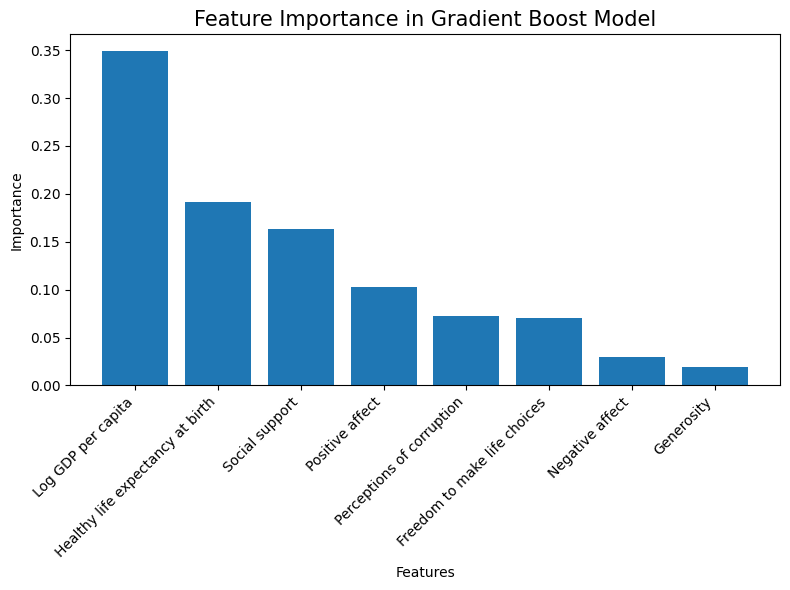

In [218]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Gradient Boost Model', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [219]:
#Checking for overfitting
gb_regressor.fit(X_train, y_train)

train_pred = gb_regressor.predict(X_train)
test_pred = gb_regressor.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("Overfitting Diagnostics:")
print(" Performance Comparison:")
print(f"   Training R² Score: {train_r2:.4f}")
print(f"   Testing R² Score:  {test_r2:.4f}")
print(f"   Training MSE:      {train_mse:.4f}")
print(f"   Testing MSE:       {test_mse:.4f}")


Overfitting Diagnostics:
 Performance Comparison:
   Training R² Score: 0.9017
   Testing R² Score:  0.8494
   Training MSE:      0.1280
   Testing MSE:       0.1882


In order to decrease the overfit a new model was created, with adjusted parameters.

---



**GRADIENT BOOST MODEL 2**



In [220]:
#Identify features
X = happy_df.drop('Life Ladder', axis=1)

In [221]:
#Identify target variable
y = happy_df['Life Ladder']
y[:5]

,Life Ladder
0,3.723590
1,4.401778
2,4.758381
3,3.831719
4,3.782938


In [222]:
# Proper train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [223]:
# Create and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(
    n_estimators=300,  # Number of boosting stages
    learning_rate=0.01,  # learning rate
    max_depth=3,  # Maximum depth of individual trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    loss='squared_error',
    random_state=42
)

In [224]:
# Fit the grid search
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)

In [225]:
# Make predictions
y_pred = gb_regressor.predict(X_test)

In [226]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print results
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")


Model Performance:
Mean Squared Error: 0.2144
Mean Absolute Error: 0.3544
R-squared Score: 0.8285


In [227]:
# Feature importance
feature_importance = gb_regressor.feature_importances_
feature_names = X.columns.tolist()

# Create a DataFrame of feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_regressor.feature_importances_
}).sort_values('importance', ascending=False)


print("\nFeature Importances:")
print(feature_importance)


Feature Importances:
                            feature  importance
0                Log GDP per capita    0.523340
1                    Social support    0.203568
2  Healthy life expectancy at birth    0.121232
6                   Positive affect    0.115353
3      Freedom to make life choices    0.013749
5         Perceptions of corruption    0.011507
4                        Generosity    0.005736
7                   Negative affect    0.005515


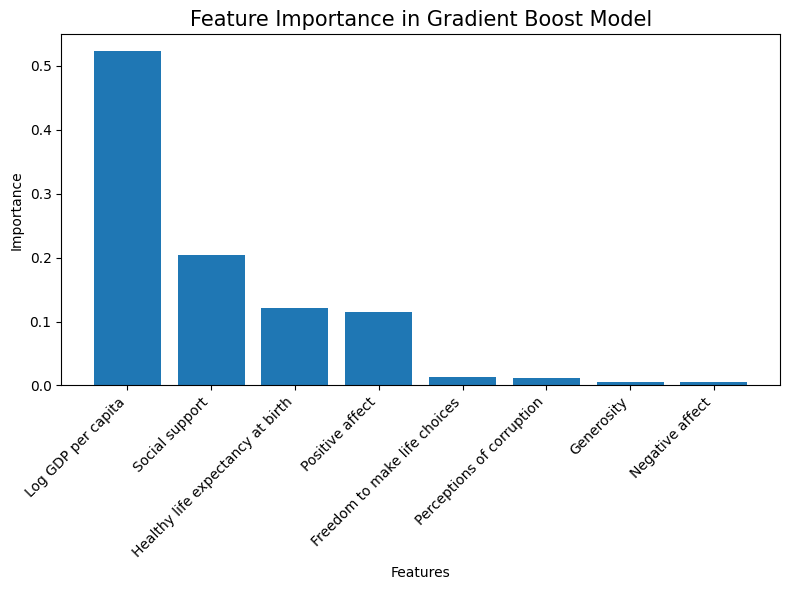

In [228]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Gradient Boost Model', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [229]:
#Checking for overfitting
gb_regressor.fit(X_train, y_train)

train_pred = gb_regressor.predict(X_train)
test_pred = gb_regressor.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("Overfitting Diagnostics:")
print(" Performance Comparison:")
print(f"   Training R² Score: {train_r2:.4f}")
print(f"   Testing R² Score:  {test_r2:.4f}")
print(f"   Training MSE:      {train_mse:.4f}")
print(f"   Testing MSE:       {test_mse:.4f}")


Overfitting Diagnostics:
 Performance Comparison:
   Training R² Score: 0.8501
   Testing R² Score:  0.8285
   Training MSE:      0.1952
   Testing MSE:       0.2144


**GRADIENT BOOST MODEL WITH REGIONS**

In [230]:
#Create copy of dataframe
world_happiness_data_region_df = happiness_df.copy()

In [231]:
# Drop columns that are not needed
world_happiness_data_region_df = world_happiness_data_region_df.drop(columns=["Country name", "alpha-3", "sub-region", "year"])
world_happiness_data_region_df.head()

,region,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,Asia,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,Asia,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,Asia,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,Asia,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,Asia,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938


In [232]:
#Drop NaN for model
world_happiness_data_region_df = world_happiness_data_region_df.dropna()

In [233]:
# Create dummie variables for region
region_dummies = pd.get_dummies(world_happiness_data_region_df["region"]).astype(int)
region_dummies.head()

,Africa,Americas,Asia,Europe,Oceania
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [234]:
# Join the the region_dummies and the world_happiness_data_region_df
world_happiness_data_region_df = pd.concat([world_happiness_data_region_df, region_dummies], axis=1)

# Identify features
X1 = world_happiness_data_region_df.drop(columns=["region", "Life Ladder"])
X1.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Africa,Americas,Asia,Europe,Oceania
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0,0,1,0,0
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0,0,1,0,0
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0,0,1,0,0
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0,0,1,0,0
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0,0,1,0,0


In [235]:
#Identify target variables
y1 = world_happiness_data_region_df["Life Ladder"]
y1.head()

,Life Ladder
0,3.723590
1,4.401778
2,4.758381
3,3.831719
4,3.782938


In [236]:
# Splitting into Train and Test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=78)

In [237]:
# Create and train the Gradient Boosting Regressor
gb_regressor1 = GradientBoostingRegressor(
    n_estimators=300,  # Number of boosting stages
    learning_rate=0.01,  # learning rate
    max_depth=3,  # Maximum depth of individual trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    loss='squared_error',
    random_state=42
)

In [238]:
# Fit the grid search
gb_regressor1.fit(X1_train, y1_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)

In [239]:
# Make predictions
y1_pred = gb_regressor1.predict(X1_test)

In [240]:
# Evaluate the model
mse1 = mean_squared_error(y1_test, y1_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
# Print results
print("\nModel Performance:")
print(f"Mean Squared Error: {mse1:.4f}")
print(f"Mean Absolute Error: {mae1:.4f}")
print(f"R-squared Score: {r2_1:.4f}")


Model Performance:
Mean Squared Error: 0.2383
Mean Absolute Error: 0.3701
R-squared Score: 0.8224


In [258]:
# Feature importance
feature_importance_region = gb_regressor1.feature_importances_
feature_names_region = X1.columns.tolist()

# Create a DataFrame of feature importances
feature_importance_region = pd.DataFrame({
    'feature': X1_test.columns,
    'importance': gb_regressor1.feature_importances_
}).sort_values('importance', ascending=False)


print("\nFeature Importances:")
print(feature_importance_region)
feature_importance_region = feature_importance_region.sort_values('importance', ascending=False).head(8)
feature_importance_region


Feature Importances:
                             feature  importance
0                 Log GDP per capita    0.528143
1                     Social support    0.199736
2   Healthy life expectancy at birth    0.090607
6                    Positive affect    0.089712
9                           Americas    0.050343
3       Freedom to make life choices    0.014244
5          Perceptions of corruption    0.010473
4                         Generosity    0.006711
7                    Negative affect    0.005648
8                             Africa    0.003579
10                              Asia    0.000558
11                            Europe    0.000246
12                           Oceania    0.000000


,feature,importance
0,Log GDP per capita,0.528143
1,Social support,0.199736
2,Healthy life expectancy at birth,0.090607
6,Positive affect,0.089712
9,Americas,0.050343
3,Freedom to make life choices,0.014244
5,Perceptions of corruption,0.010473
4,Generosity,0.006711


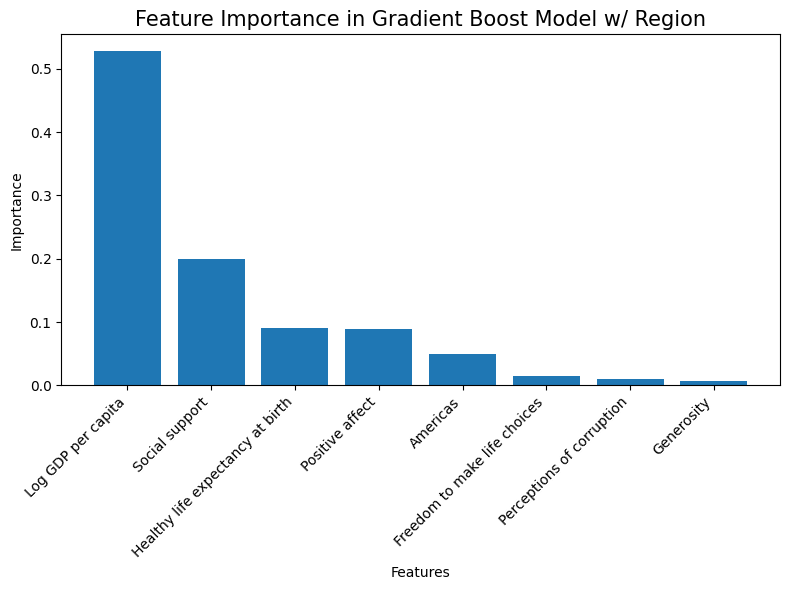

In [259]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_region['feature'], feature_importance_region['importance'])
plt.title('Feature Importance in Gradient Boost Model w/ Region', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [243]:
#Checking for overfitting
gb_regressor1.fit(X1_train, y1_train)

train_pred1 = gb_regressor1.predict(X1_train)
test_pred1 = gb_regressor1.predict(X1_test)

train_r2_1 = r2_score(y1_train, train_pred1)
test_r2_1 = r2_score(y1_test, test_pred1)

train_mse1 = mean_squared_error(y1_train, train_pred1)
test_mse1 = mean_squared_error(y1_test, test_pred1)

print("Overfitting Diagnostics:")
print(" Performance Comparison:")
print(f"   Training R² Score: {train_r2_1:.4f}")
print(f"   Testing R² Score:  {test_r2_1:.4f}")
print(f"   Training MSE:      {train_mse1:.4f}")
print(f"   Testing MSE:       {test_mse1:.4f}")


Overfitting Diagnostics:
 Performance Comparison:
   Training R² Score: 0.8601
   Testing R² Score:  0.8224
   Training MSE:      0.1786
   Testing MSE:       0.2383


This model was used for comparison.


---



**GRADIENT BOOST MODEL WITH SUB-REGIONS**

In [244]:
#Create copy of dataframe
world_happiness_data_subregion_df = happiness_df.copy()

In [245]:
# Drop columns that are not needed
world_happiness_data_subregion_df = world_happiness_data_subregion_df.drop(columns=["Country name", "alpha-3", "region", "year"])
world_happiness_data_subregion_df.head()

,sub-region,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,Southern Asia,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,3.723590
1,Southern Asia,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,4.401778
2,Southern Asia,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,4.758381
3,Southern Asia,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,3.831719
4,Southern Asia,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,3.782938


In [246]:
#Drop NaN for model
world_happiness_data_subregion_df = world_happiness_data_subregion_df.dropna()

In [247]:
# Create dummie variables for region
subregion_dummies = pd.get_dummies(world_happiness_data_subregion_df["sub-region"]).astype(int)
subregion_dummies.head()

,Australia and New Zealand,Central Asia,Eastern Asia,Eastern Europe,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [248]:
# Join the the region_dummies and the world_happiness_data_region_df
world_happiness_data_subregion_df = pd.concat([world_happiness_data_subregion_df, subregion_dummies], axis=1)

# Identify features
X2 = world_happiness_data_subregion_df.drop(columns=["sub-region", "Life Ladder"])
X2.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Australia and New Zealand,Central Asia,...,Latin America and the Caribbean,Northern Africa,Northern America,Northern Europe,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
0,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,0,0,...,0,0,0,0,0,1,0,0,0,0


In [249]:
#Identify target variables
y2 = world_happiness_data_subregion_df["Life Ladder"]
y2.head()

,Life Ladder
0,3.723590
1,4.401778
2,4.758381
3,3.831719
4,3.782938


In [250]:
# Splitting into Train and Test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=78)

In [251]:
# Create and train the Gradient Boosting Regressor
gb_regressor2 = GradientBoostingRegressor(
    n_estimators=300,  # Number of boosting stages
    learning_rate=0.01,  # learning rate
    max_depth=3,  # Maximum depth of individual trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    loss='squared_error',
    random_state=42
)

In [252]:
# Fit the grid search
gb_regressor2.fit(X2_train, y2_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)

In [253]:
# Make predictions
y2_pred = gb_regressor2.predict(X2_test)

In [254]:
# Evaluate the model
mse2 = mean_squared_error(y2_test, y2_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
# Print results
print("\nModel Performance:")
print(f"Mean Squared Error: {mse2:.4f}")
print(f"Mean Absolute Error: {mae2:.4f}")
print(f"R-squared Score: {r2_2:.4f}")


Model Performance:
Mean Squared Error: 0.2373
Mean Absolute Error: 0.3695
R-squared Score: 0.8232


In [260]:
# Feature importance
feature_importance_subregion = gb_regressor2.feature_importances_
feature_names_subregion = X2.columns.tolist()

# Create a DataFrame of feature importances
feature_importance_subregion = pd.DataFrame({
    'feature': X2_test.columns,
    'importance': gb_regressor2.feature_importances_
}).sort_values('importance', ascending=False)


print("\nFeature Importances:")
print(feature_importance_subregion)
feature_importance_subregion = feature_importance_subregion.sort_values('importance', ascending=False).head(8)
feature_importance_subregion


Feature Importances:
                             feature  importance
0                 Log GDP per capita    0.523128
1                     Social support    0.201007
2   Healthy life expectancy at birth    0.091935
6                    Positive affect    0.089017
12   Latin America and the Caribbean    0.049754
3       Freedom to make life choices    0.014596
5          Perceptions of corruption    0.009694
4                         Generosity    0.006544
7                    Negative affect    0.005166
17                     Southern Asia    0.004001
19                Sub-Saharan Africa    0.003559
20                      Western Asia    0.001149
18                   Southern Europe    0.000370
16                South-eastern Asia    0.000045
9                       Central Asia    0.000034
11                    Eastern Europe    0.000000
15                   Northern Europe    0.000000
14                  Northern America    0.000000
13                   Northern Africa    0.00000

,feature,importance
0,Log GDP per capita,0.523128
1,Social support,0.201007
2,Healthy life expectancy at birth,0.091935
6,Positive affect,0.089017
12,Latin America and the Caribbean,0.049754
3,Freedom to make life choices,0.014596
5,Perceptions of corruption,0.009694
4,Generosity,0.006544


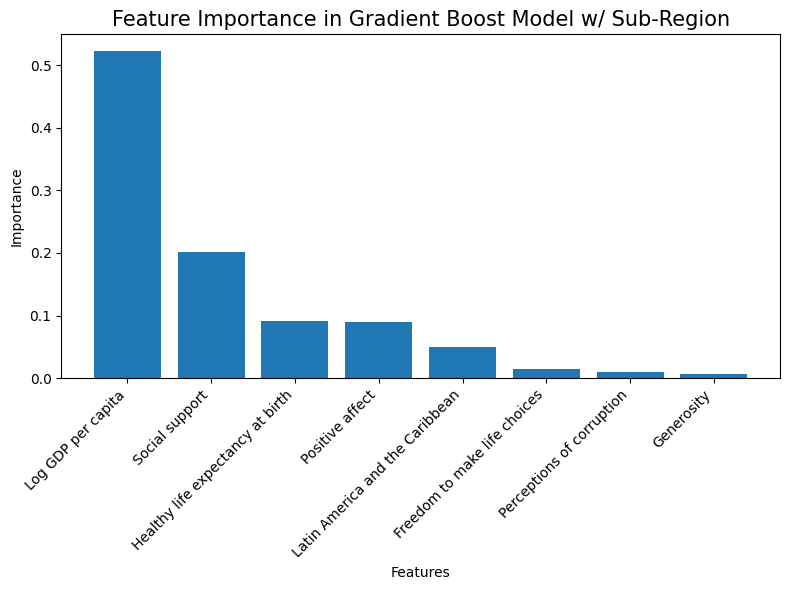

In [261]:
#Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_subregion['feature'], feature_importance_subregion['importance'])
plt.title('Feature Importance in Gradient Boost Model w/ Sub-Region', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [262]:
#Checking for overfitting
gb_regressor2.fit(X2_train, y2_train)

train_pred2 = gb_regressor2.predict(X2_train)
test_pred2 = gb_regressor2.predict(X2_test)

train_r2_2 = r2_score(y2_train, train_pred2)
test_r2_2 = r2_score(y2_test, test_pred2)

train_mse2 = mean_squared_error(y2_train, train_pred2)
test_mse2 = mean_squared_error(y2_test, test_pred2)

print("Overfitting Diagnostics:")
print(" Performance Comparison:")
print(f"   Training R² Score: {train_r2_2:.4f}")
print(f"   Testing R² Score:  {test_r2_2:.4f}")
print(f"   Training MSE:      {train_mse2:.4f}")
print(f"   Testing MSE:       {test_mse2:.4f}")


Overfitting Diagnostics:
 Performance Comparison:
   Training R² Score: 0.8620
   Testing R² Score:  0.8232
   Training MSE:      0.1762
   Testing MSE:       0.2373
